In [6]:
import numpy as np
from sklearn.manifold import MDS

def train_landmark_mds(X_landmark, n_components=2, random_state=42, n_jobs=-1):
    """
    Train an MDS model on the landmark points.
    
    Args:
        X_landmark (ndarray): Landmark points (n_landmark x n_features).
        n_components (int): Number of dimensions for the embedding.
    
    Returns:
        Y_landmark (ndarray): Low-dimensional embedding of the landmarks (n_landmark x n_components).
    """
    mds = MDS(n_components=n_components, random_state=random_state, n_jobs=n_jobs)
    Y_landmark = mds.fit_transform(X_landmark)
    return Y_landmark

def predict_landmark_mds(Y_landmark, X_landmark, X_new):
    """
    Predict embeddings for new points using the landmark MDS embedding.
    
    Args:
        Y_landmark (ndarray): Low-dimensional embedding of the landmarks (n_landmark x n_components).
        X_landmark (ndarray): Original high-dimensional landmark points (n_landmark x n_features).
        X_new (ndarray): High-dimensional new points (n_new x n_features).
    
    Returns:
        Y_new (ndarray): Low-dimensional embedding of the new points (n_new x n_components).
    """
    # Step 2: Compute distances from new points to landmarks in high-dimensional space
    D_new_landmark = np.linalg.norm(X_new[:, np.newaxis, :] - X_landmark[np.newaxis, :, :], axis=-1)
    
    # Step 3: Approximate embeddings for new points
    n_new, n_landmark = D_new_landmark.shape
    n_components = Y_landmark.shape[1]
    Y_new = np.zeros((n_new, n_components))
    
    for i in range(n_new):
        # Minimize stress for each new point
        distances = D_new_landmark[i]
        weights = 1 / (distances + 1e-6)  # Add small constant to avoid division by zero
        
        # Weighted least-squares approximation
        Y_new[i] = np.sum(weights[:, np.newaxis] * Y_landmark, axis=0) / np.sum(weights)
    
    return Y_new

# # Example usage
# if __name__ == "__main__":
#     # Landmark points
#     X_landmark = np.random.random((100, 10))  # 100 points, 10 features
#     Y_landmark = train_landmark_mds(X_landmark, n_components=2)
    
#     # New points
#     X_new = np.random.random((10, 10))  # 10 new points, 10 features
#     Y_new = predict_landmark_mds(Y_landmark, X_landmark, X_new)
    
#     print("Landmark Embeddings:\n", Y_landmark)
#     print("New Point Embeddings:\n", Y_new)

In [7]:
X_pca = np.load('../data_main/X_pca.npy')
X_phate = np.load('../data_main/X_phate.npy')
X_phate_vis = np.load('../data_main/X_phate_vis.npy')

In [9]:
np.random.seed(42)
n_landmark = 2000
landmark_idx = np.random.choice(X_phate.shape[0], n_landmark, replace=False)
X_landmark = X_phate[landmark_idx]
Y_landmark = train_landmark_mds(X_landmark, n_components=2)

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [10]:
import matplotlib.pyplot as plt

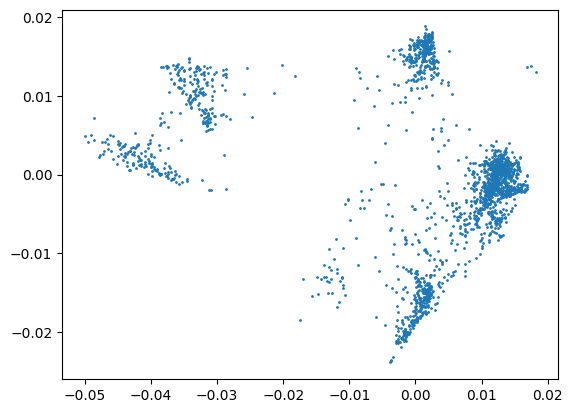

In [11]:
plt.scatter(Y_landmark[:, 0], Y_landmark[:, 1], s=1)


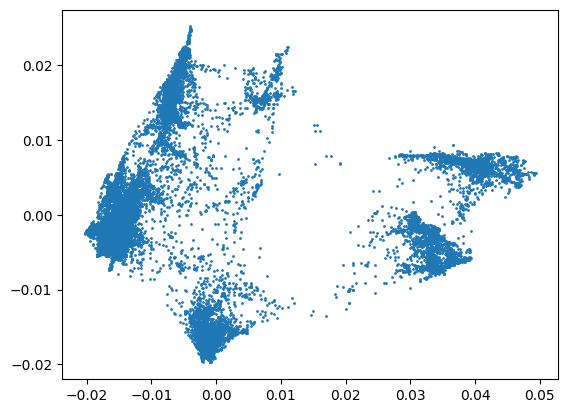

In [12]:
plt.scatter(X_phate_vis[:, 0], X_phate_vis[:, 1], s=1)